<a href="https://colab.research.google.com/github/Z5-05/study_third_sem/blob/main/ml/Mephi_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pymorphy2

In [ ]:
import re
import requests
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pymorphy2

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "./drive/MyDrive/ML_mephi/data_lab_2.csv"
df = pd.read_csv(path)
df['stars_t'] = np.where(df['stars'] <= 3, 'n', 'p')
df['stars_color'] = np.where(df['stars'] <= 3, 'r', 'b')

In [ ]:
df['body'] = df['body'].str.lower()
df['body'] = df['body'].apply(lambda x: x.replace("\n", " "))

In [ ]:
all_words = ''.join(df['body'].values)
vocab = list(set(re.findall('\w+', all_words)))
print(f"Размер словаря: {len(vocab)}")

Размер словаря: 10214


In [ ]:
def count_tokens(x):
  ls = []
  for token in vocab:
    ls += [x.count(token)]
  return ls

In [ ]:
df_re = df.body.apply(lambda x: pd.Series(count_tokens(x)))
df_re.columns = vocab
df_re.head()

,фоновая,победит,лела,никого,ребята,оторванными,отнеслась,подводного,лесное,поселение,...,отзывымне,стоили,сверхлюди,окружения,сценарием,признают,пунктом,вышедший,понимаешь,необычный
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_counter = df['body'].apply(lambda x: pd.Series(collections.Counter(re.findall('\w+', x)))).fillna(0)
df_counter.head()

,привет,наконец,то,он,вышел,долгожданное,продолжение,культового,фильма,аватар,...,легенда,достойного,увлекают,коленки,довольны,болит,поплакать,переворачивается,ног,закружилась
0,1.0,1.0,5.0,3.0,1.0,1.0,3.0,1.0,8.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,6.0,3.0,0.0,0.0,1.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,17.0,22.0,0.0,0.0,3.0,0.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = TfidfVectorizer(ngram_range=(1,3), max_features=20)
df_tfidf = pd.DataFrame(model.fit_transform(df['body']).toarray(), columns=model.get_feature_names_out())
df_tfidf.head()

,аватар,аватар путь,аватар путь воды,воды,все,за,как,на,не,но,очень,по,путь,путь воды,так,то,фильм,фильма,что,это
0,0.369304,0.323935,0.272347,0.243776,0.234423,0.082067,0.107772,0.322435,0.257948,0.147946,0.078464,0.022323,0.299884,0.252003,0.209002,0.095221,0.259802,0.166637,0.185141,0.130404
1,0.165304,0.217495,0.219430,0.196410,0.057235,0.165304,0.048240,0.389679,0.562869,0.049667,0.158046,0.179860,0.201347,0.203038,0.124736,0.153439,0.130827,0.055941,0.271214,0.250158
2,0.163844,0.172459,0.173994,0.155741,0.170188,0.098307,0.114753,0.257491,0.540732,0.265832,0.125320,0.213926,0.159655,0.160996,0.111271,0.182500,0.181540,0.166342,0.430110,0.059508
3,0.080451,0.021170,0.021359,0.038236,0.083566,0.176993,0.338078,0.417233,0.480451,0.188543,0.153838,0.140057,0.039197,0.039526,0.364243,0.253901,0.076406,0.098013,0.343191,0.146098
4,0.178123,0.000000,0.000000,0.000000,0.370038,0.089061,0.311883,0.489879,0.454887,0.280971,0.042575,0.290711,0.000000,0.000000,0.000000,0.082669,0.070486,0.045209,0.292246,0.121300


In [ ]:
model = CountVectorizer(ngram_range=(1,3), max_features=20)
df_ct_vec = pd.DataFrame(model.fit_transform(df['body']).toarray(),columns=model.get_feature_names_out())
df_ct_vec.head()

,аватар,аватар путь,аватар путь воды,воды,все,за,как,на,не,но,очень,по,путь,путь воды,так,то,фильм,фильма,что,это
0,18,12,10,10,11,4,6,20,16,8,4,1,12,10,9,5,16,8,11,7
1,3,3,3,3,1,3,1,9,13,1,3,3,3,3,2,3,3,1,6,5
2,5,4,4,4,5,3,4,10,21,9,4,6,4,4,3,6,7,5,16,2
3,5,1,1,2,5,11,24,33,38,13,10,8,2,2,20,17,6,6,26,10
4,4,0,0,0,8,2,8,14,13,7,1,6,0,0,0,2,2,1,8,3


In [ ]:
pca = PCA(n_components=2)
df_counter_pca = pd.DataFrame(pca.fit_transform(df_counter))
df_counter_pca.head()

,0,1
0,29.873520,16.258918
1,0.935253,-0.087840
2,25.854234,-4.350831
3,112.248583,-32.093415
4,25.604117,-9.573528


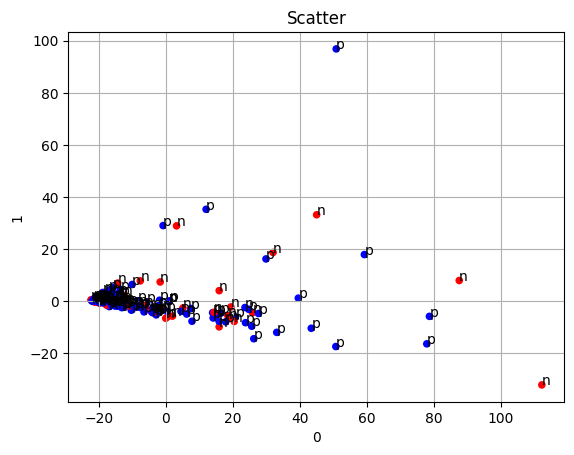

In [ ]:
df_counter_pca.plot(x=0, y=1, kind='scatter', c=df['stars_color'])
for i,row in df_counter_pca.iterrows():
  plt.text(row[0], row[1], s=df.stars_t[i])
plt.title("Scatter")
plt.grid()
plt.show()

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
path = "./drive/MyDrive/ML_mephi/kartaslovsent.csv"
adj_df = pd.read_csv(path, delimiter=';')

PSTV_adj = []
for word in adj_df[adj_df['tag']=='PSTV']['term'].array:
  if str(morph.parse(word)[0].tag.POS) in ('ADJS', 'ADJF'):
    PSTV_adj.append(morph.parse(word)[0].normal_form)

NGTV_adj = []
for word in adj_df[adj_df['tag']=='NGTV']['term'].array:
  if str(morph.parse(word)[0].tag.POS) in ('ADJS', 'ADJF'):
    NGTV_adj.append(morph.parse(word)[0].normal_form)

vocal_tagged_adj = PSTV_adj + NGTV_adj

In [ ]:
prev_list = list(df_counter.columns)
next_list = []
final_list = []


for word in prev_list:
  next_list.append(morph.parse(word)[0].normal_form)
  if (str(morph.parse(word)[0].tag.POS) in ('ADJS', 'ADJF')) & (morph.parse(word)[0].normal_form in vocal_tagged_adj):
    final_list.append(morph.parse(word)[0].normal_form)
df_counter.columns = next_list
df_counter_adjs = df_counter[final_list]

In [ ]:
pca = PCA(n_components=2)
df_counter_adjs_pca = pd.DataFrame(pca.fit_transform(df_counter_adjs))

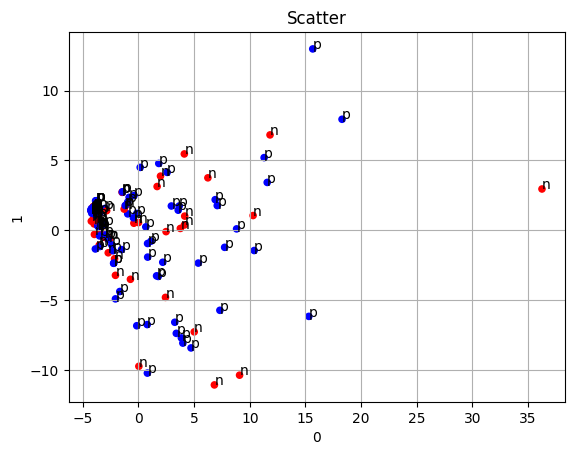

In [ ]:
df_counter_adjs_pca.plot(x=0, y=1, kind='scatter', c=df['stars_color'])
for i,row in df_counter_adjs_pca.iterrows():
  plt.text(row[0], row[1], s=df.stars_t[i])
plt.title("Scatter")
plt.grid()
plt.show()